In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [ ]:
df_fish= pd.read_csv('fish.csv',header= None)
df_fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


#Preprocessing

In [ ]:
df_fish.describe()

,1,2,3,4,5,6
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [ ]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       85 non-null     object 
 1   1       85 non-null     float64
 2   2       85 non-null     float64
 3   3       85 non-null     float64
 4   4       85 non-null     float64
 5   5       85 non-null     float64
 6   6       85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [ ]:
df_fish.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


In [ ]:
df_fish.duplicated().sum()

np.int64(0)

In [ ]:
df_fish.nunique()

,0
0,4
1,66
2,72
3,62
4,72
5,69
6,45


#K-means

In [ ]:
x=df_fish.drop(0, axis=1)
x

,1,2,3,4,5,6
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...
80,950.0,48.3,51.7,55.1,16.2,11.2
81,1250.0,52.0,56.0,59.7,17.9,11.7
82,1600.0,56.0,60.0,64.0,15.0,9.6
83,1550.0,56.0,60.0,64.0,15.0,9.6


In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

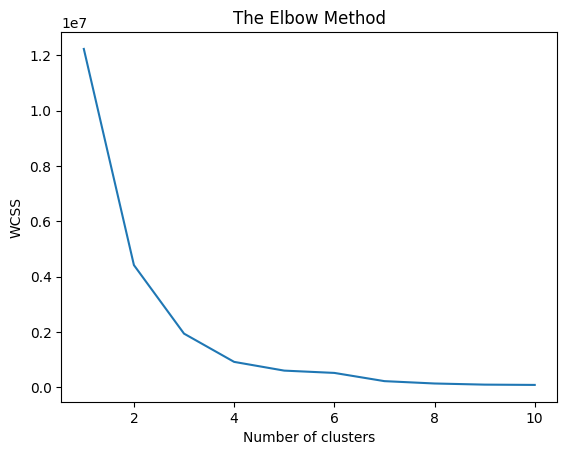

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#from the elbow plot , we can fix value of k as 3
kmeans= KMeans(n_clusters=3, init='k-means++')
y_kmeans= kmeans.fit_predict(x)

In [ ]:
x['Cluster']=y_kmeans
x.head()

,1,2,3,4,5,6,Cluster
0,242.0,23.2,25.4,30.0,38.4,13.4,0
1,290.0,24.0,26.3,31.2,40.0,13.8,0
2,340.0,23.9,26.5,31.1,39.8,15.1,2
3,363.0,26.3,29.0,33.5,38.0,13.3,2
4,430.0,26.5,29.0,34.0,36.6,15.1,2


In [ ]:
df_fish

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


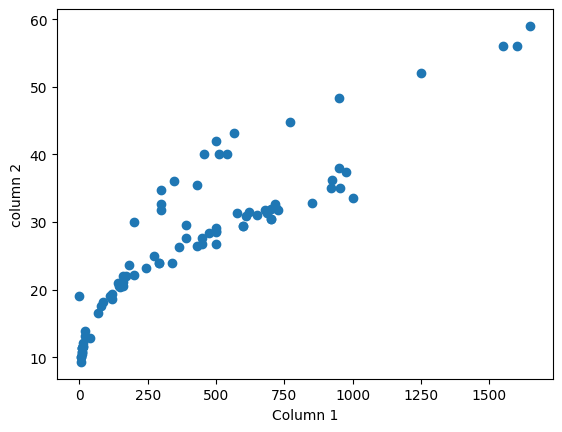

In [ ]:
#before clustering
plt.scatter(x[1],x[2])
plt.xlabel('Column 1')
plt.ylabel('column 2')
plt.show()

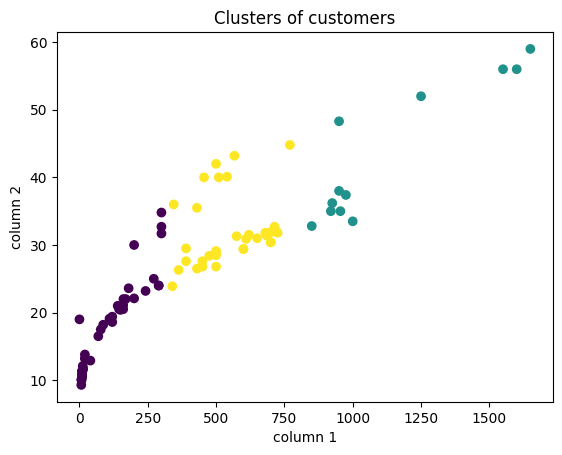

In [ ]:
#after clustering
plt.scatter(x[1],x[2], c= x['Cluster'])
plt.title('Clusters of customers')
plt.xlabel('column 1')
plt.ylabel('column 2')
plt.show()

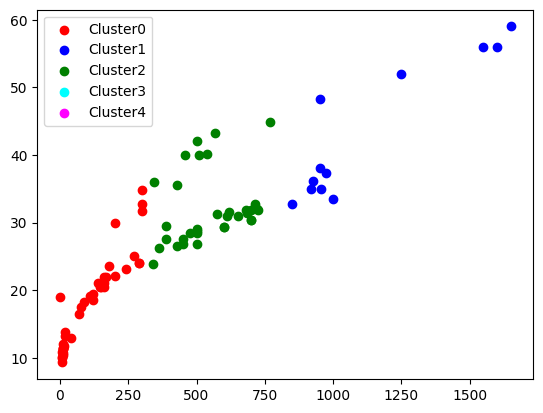

In [ ]:
colors= ['red','blue','green','cyan','magenta']
for i in range(5):
  cluster_data= x[y_kmeans==i]
  plt.scatter(x[x['Cluster']==i][1],
              x[x['Cluster']==i][2],
              c=colors[i],label=f'Cluster{i}')
plt.legend()
plt.show()

In [ ]:
#predict the cluster
def predict_cluster(a,b,c,d,e,f):
  new_data= [[a,b,c,d,e,f]]
  cluster=kmeans.predict(new_data)
  return cluster[0]

In [ ]:
predicted_cluster= predict_cluster(50,100,20,30,40,15)
print("the values belong to the cluster",predicted_cluster)

the values belong to the cluster 0


#Agglomerative heirarchical clustering

In [ ]:
ag_cluster =linkage(x,method='ward')

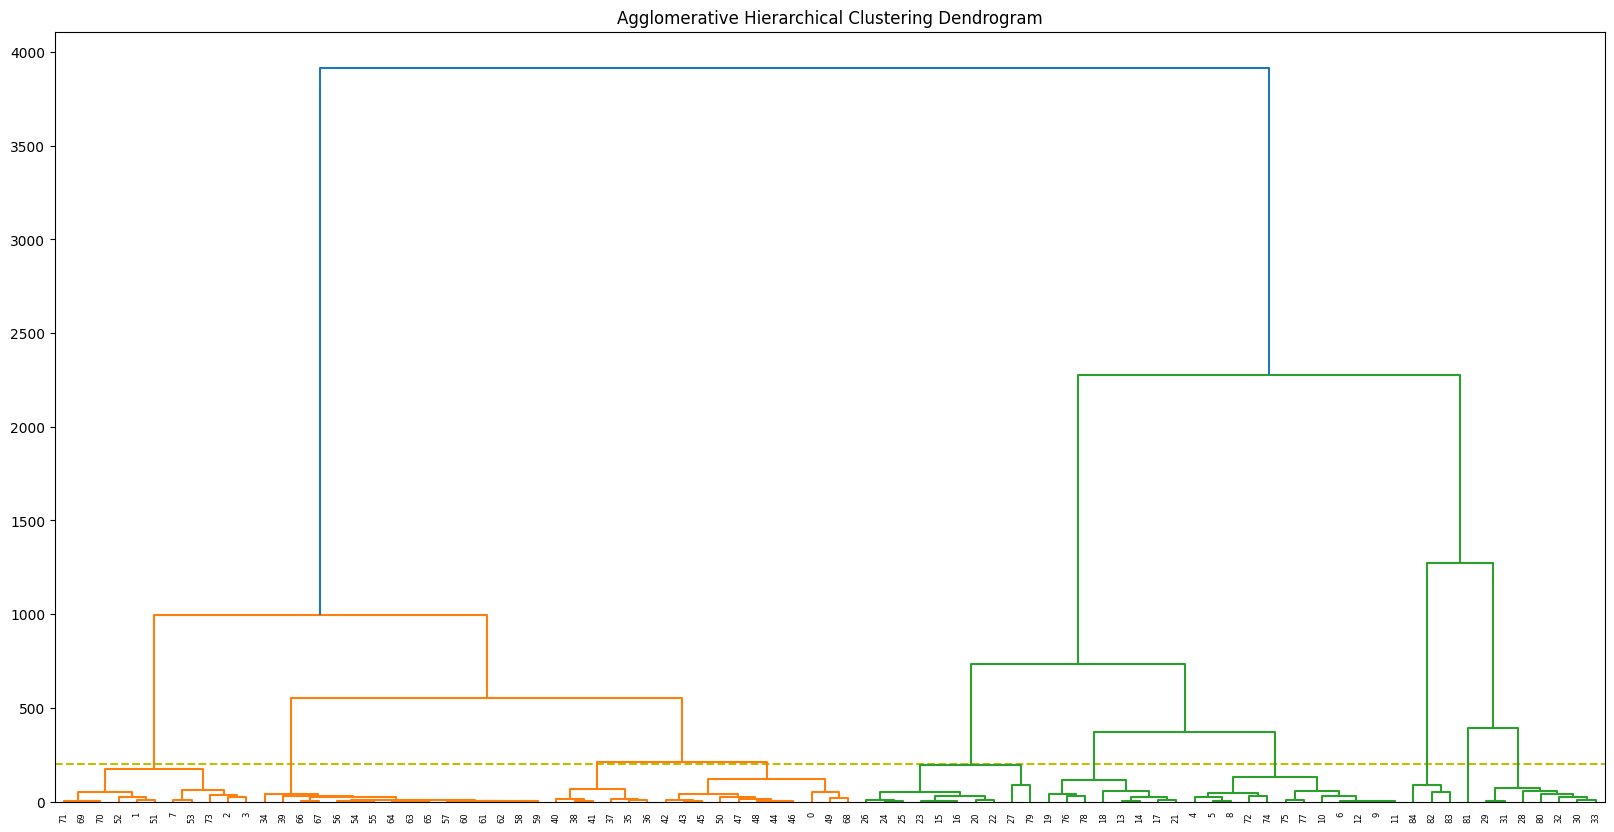

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.axhline(y=200, color='y',linestyle='--')
dendrogram(ag_cluster)
plt.show()

In [ ]:
cluster_labels=fcluster(ag_cluster, t=200, criterion='distance')
x['cluster_agglomerative']= cluster_labels
x.head()

,1,2,3,4,5,6,Cluster,cluster_agglomerative
0,242.0,23.2,25.4,30.0,38.4,13.4,0,4
1,290.0,24.0,26.3,31.2,40.0,13.8,0,1
2,340.0,23.9,26.5,31.1,39.8,15.1,2,1
3,363.0,26.3,29.0,33.5,38.0,13.3,2,1
4,430.0,26.5,29.0,34.0,36.6,15.1,2,7


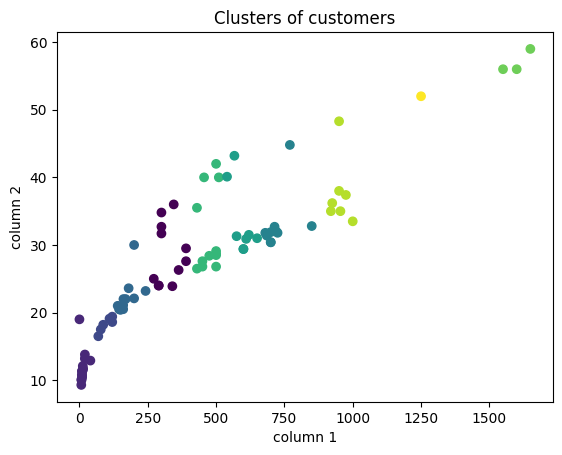

In [ ]:
#after clustering
plt.scatter(x[1],x[2], c= x['cluster_agglomerative'])
plt.title('Clusters of customers')
plt.xlabel('column 1')
plt.ylabel('column 2')
plt.show()

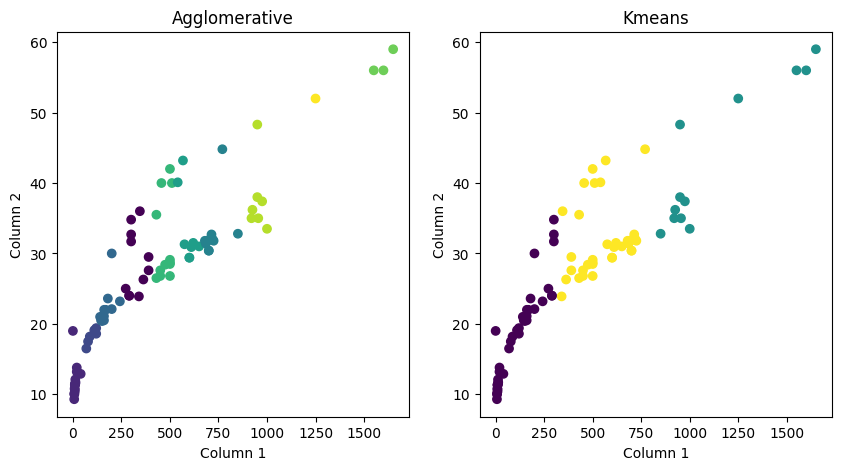

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x[1],x[2], c= x['cluster_agglomerative'])
plt.title('Agglomerative')
plt.xlabel('Column 1')
plt.ylabel('Column 2')

plt.subplot(1,2,2)
plt.scatter(x[1],x[2], c= x['Cluster'])
plt.title('Kmeans')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.show()